<a href="https://colab.research.google.com/github/SongHM-cloud/SongHM-cloud/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

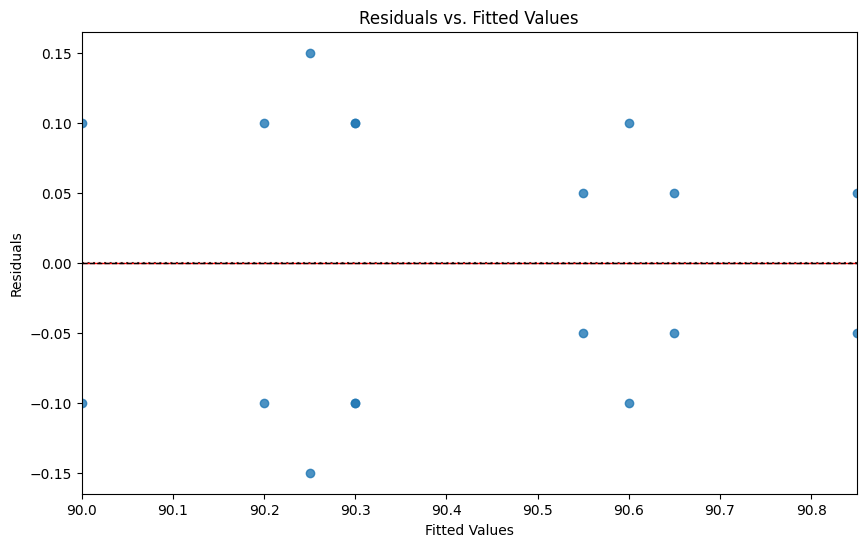

<Figure size 1000x600 with 0 Axes>

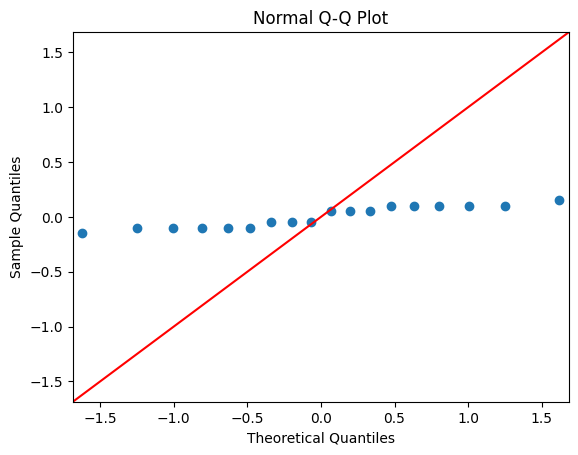

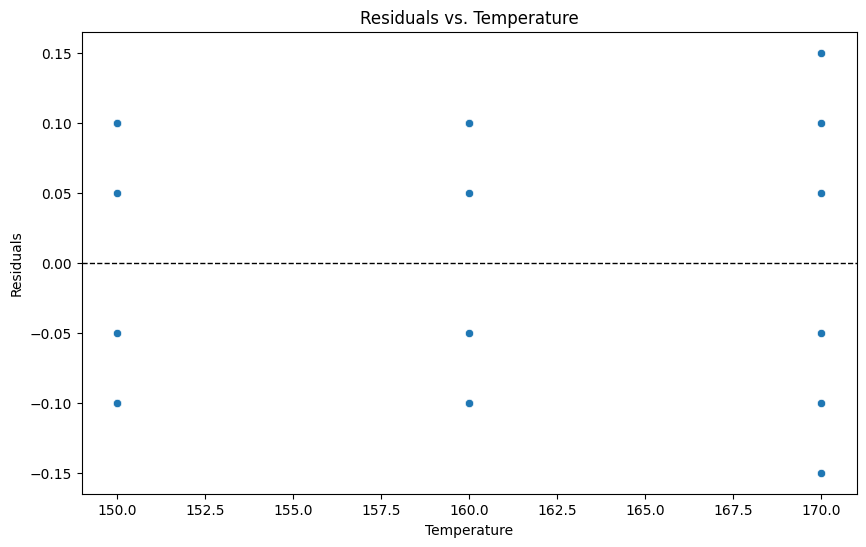

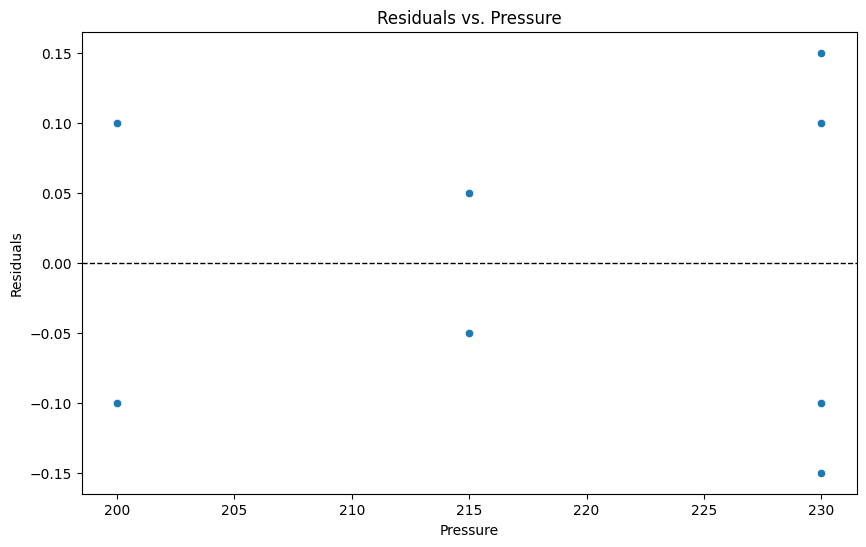

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data
data = {
    'Temperature': [150, 150, 150, 150, 150, 150, 160, 160, 160, 160, 160, 160, 170, 170, 170, 170, 170, 170],
    'Pressure': [200, 200, 215, 215, 230, 230, 200, 200, 215, 215, 230, 230, 200, 200, 215, 215, 230, 230],
    'Yield': [90.4, 90.2, 90.7, 90.6, 90.2, 90.4, 90.1, 90.3, 90.5, 90.6, 89.9, 90.1, 90.5, 90.7, 90.8, 90.9, 90.4, 90.1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Fit the model
model = ols('Yield ~ C(Temperature) * C(Pressure)', data=df).fit()

# Get residuals
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs. Fitted plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Normal Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=residuals)
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.title('Residuals vs. Temperature')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Residuals vs. Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Pressure'], y=residuals)
plt.xlabel('Pressure')
plt.ylabel('Residuals')
plt.title('Residuals vs. Pressure')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Correct data
data = {
    'Glass_Type': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2],
    'Phosphor_Type': [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'Brightness': [280, 290, 285, 300, 310, 295, 230, 235, 240, 260, 240, 235, 290, 285, 290, 220, 225, 230]
}

df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('Brightness ~ C(Glass_Type) + C(Phosphor_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                        sum_sq    df           F        PR(>F)
C(Glass_Type)     14450.000000   1.0  263.869565  1.765764e-10
C(Phosphor_Type)    933.333333   2.0    8.521739  3.794055e-03
Residual            766.666667  14.0         NaN           NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Correct data
data = {
    'Glass_Type': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2],
    'Phosphor_Type': [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'Brightness': [280, 290, 285, 300, 310, 295, 230, 235, 240, 260, 240, 235, 290, 285, 290, 220, 225, 230]
}

df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('Brightness ~ C(Glass_Type) + C(Phosphor_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                        sum_sq    df           F        PR(>F)
C(Glass_Type)     14450.000000   1.0  263.869565  1.765764e-10
C(Phosphor_Type)    933.333333   2.0    8.521739  3.794055e-03
Residual            766.666667  14.0         NaN           NaN


In [ ]:
residuals = model.resid
fitted_values = model.fittedvalues


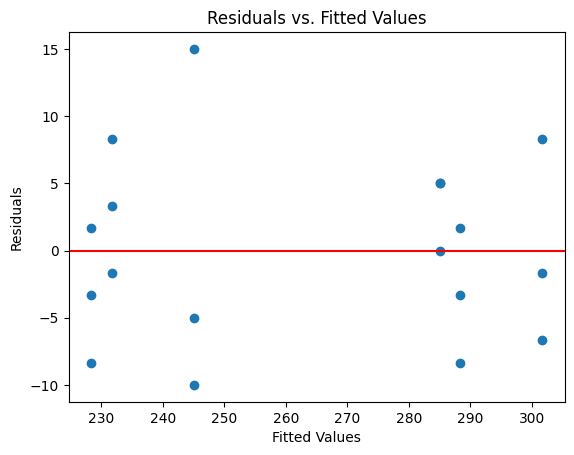

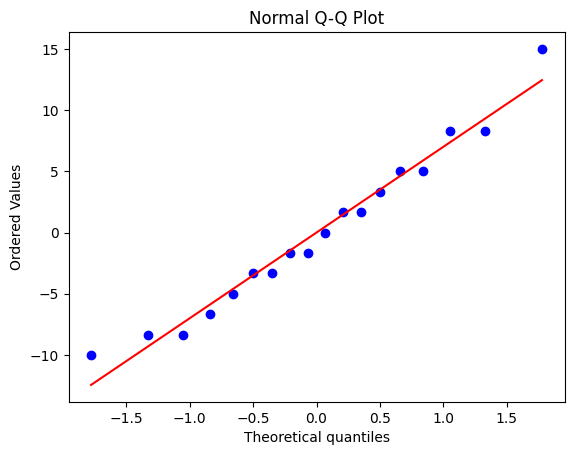

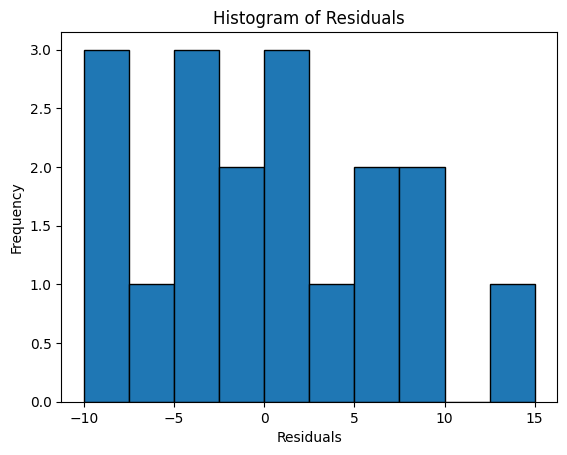

Shapiro-Wilk Test: ShapiroResult(statistic=0.9684474468231201, pvalue=0.7680379748344421)
Levene’s Test: LeveneResult(statistic=0.236842105263158, pvalue=0.6330954744571078)


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)

from scipy.stats import levene

levene_test = levene(
    df['Brightness'][df['Glass_Type'] == 1],
    df['Brightness'][df['Glass_Type'] == 2]
)
print('Levene’s Test:', levene_test)


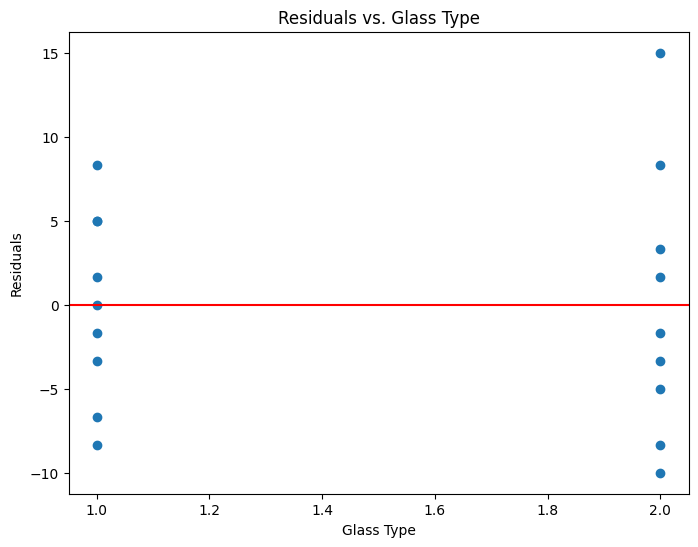

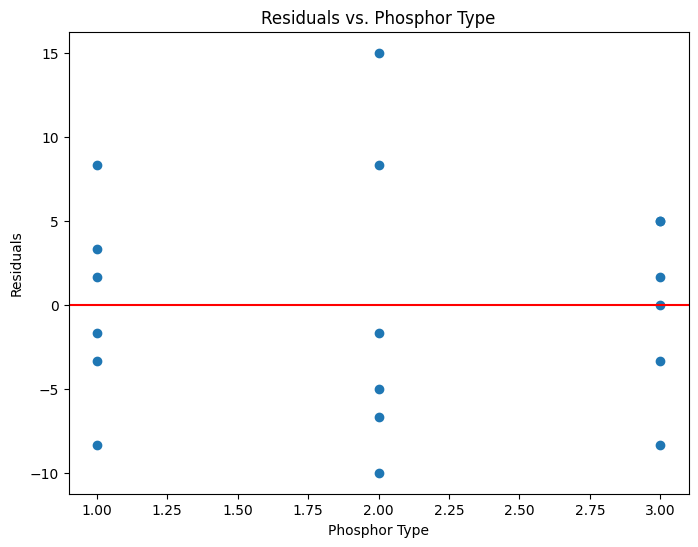

In [ ]:
import matplotlib.pyplot as plt

# Residuals vs. Glass Type
plt.figure(figsize=(8, 6))
plt.scatter(df['Glass_Type'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Glass Type')
plt.ylabel('Residuals')
plt.title('Residuals vs. Glass Type')
plt.show()

# Residuals vs. Phosphor Type
plt.figure(figsize=(8, 6))
plt.scatter(df['Phosphor_Type'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Phosphor Type')
plt.ylabel('Residuals')
plt.title('Residuals vs. Phosphor Type')
plt.show()


                        sum_sq    df           F        PR(>F)
C(Glass_Type)     14450.000000   1.0  263.869565  1.765764e-10
C(Phosphor_Type)    933.333333   2.0    8.521739  3.794055e-03
Residual            766.666667  14.0         NaN           NaN


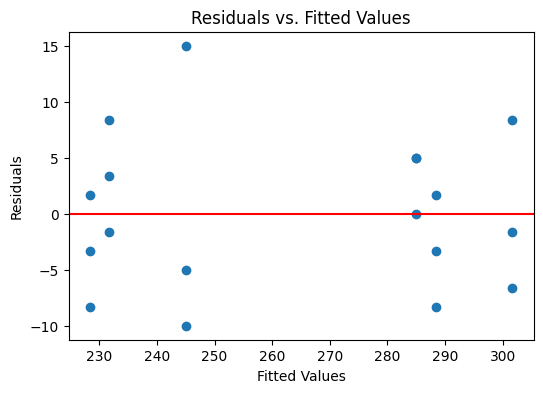

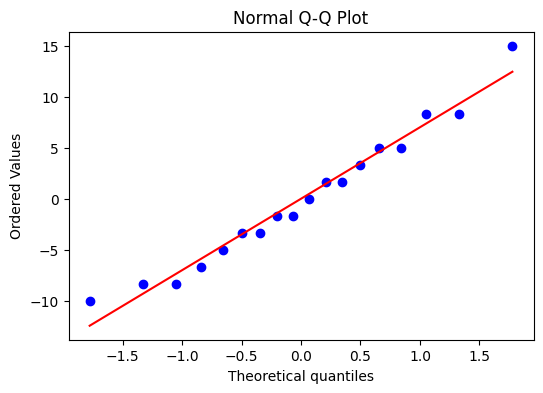

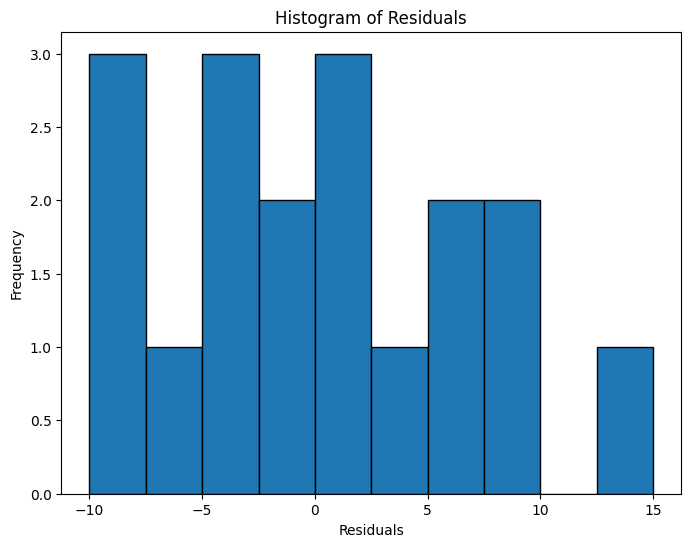

Shapiro-Wilk Test: ShapiroResult(statistic=0.9684474468231201, pvalue=0.7680379748344421)
Levene’s Test: LeveneResult(statistic=0.236842105263158, pvalue=0.6330954744571078)


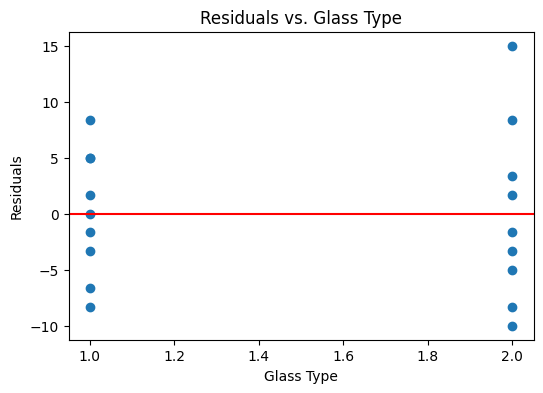

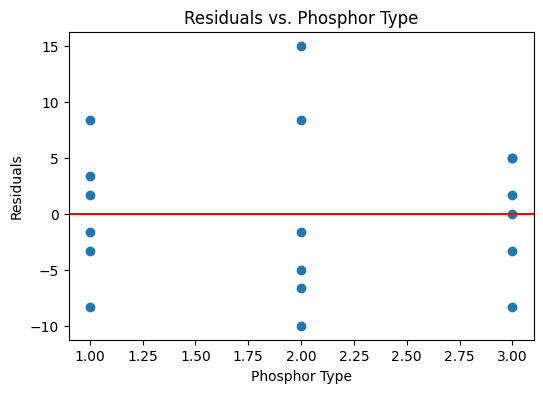

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, levene

# Data
data = {
    'Glass_Type': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2],
    'Phosphor_Type': [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'Brightness': [280, 290, 285, 300, 310, 295, 230, 235, 240, 260, 240, 235, 290, 285, 290, 220, 225, 230]
}

df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('Brightness ~ C(Glass_Type) + C(Phosphor_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Calculate Residuals
residuals = model.resid
fitted_values = model.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(6, 4))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Normal Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_test = shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)

# Levene's Test for Homogeneity of Variances
levene_test = levene(
    df['Brightness'][df['Glass_Type'] == 1],
    df['Brightness'][df['Glass_Type'] == 2]
)
print('Levene’s Test:', levene_test)

# Residuals vs. Glass Type
plt.figure(figsize=(6, 4))
plt.scatter(df['Glass_Type'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Glass Type')
plt.ylabel('Residuals')
plt.title('Residuals vs. Glass Type')
plt.show()

# Residuals vs. Phosphor Type
plt.figure(figsize=(6, 4))
plt.scatter(df['Phosphor_Type'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Phosphor Type')
plt.ylabel('Residuals')
plt.title('Residuals vs. Phosphor Type')
plt.show()
